In [1]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

from PIL import Image

from collections import defaultdict
import json
import pandas as pd 

plt.rcParams['figure.figsize'] = (15, 15)

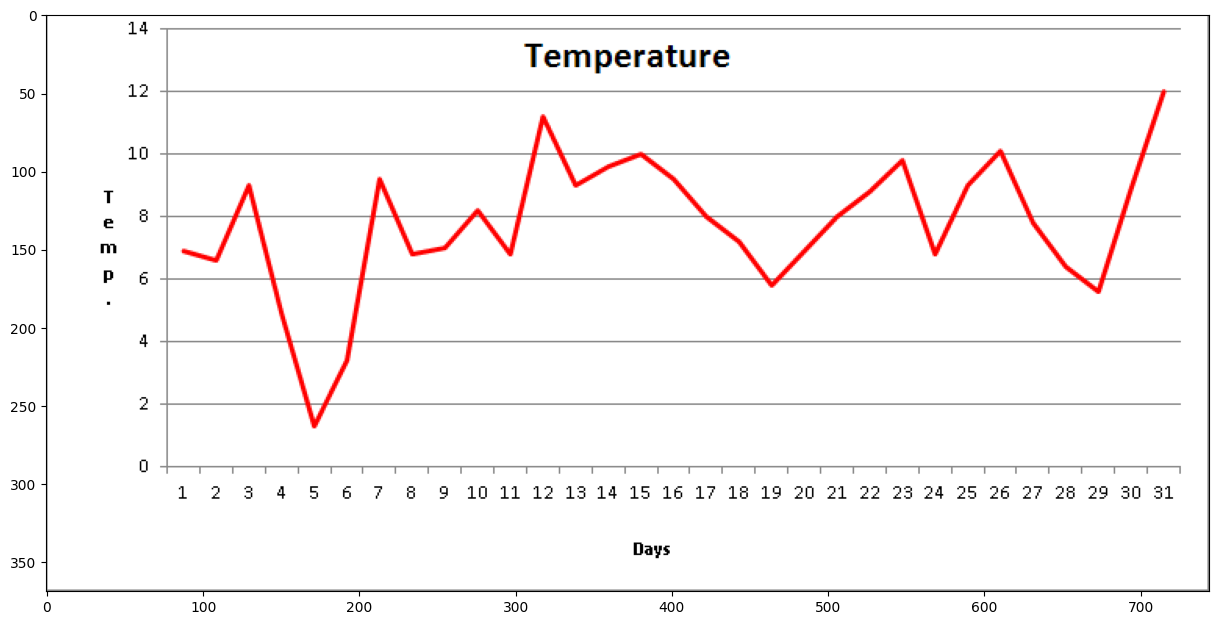

In [2]:
# show image
image_path = "../assets/dataset/reduced_data/clsdata(1031)/cls/images/train2019/010dc67e1b26f32783db66d4f5adedde_d3d3LndlYXRoZXJmb3JzY2hvb2xzLm1lLnVrCTk0LjEzNi40MC4xMDM=.xls-0-0.png"

img = Image.open(image_path)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

## Get annotations for image
Get mapping images_id ->[annotation_objects]

And mapping category_id -> category_name

In [3]:
image_ids_annotations = defaultdict(list)

# Load annotations
path = '../assets/dataset/reduced_data/clsdata(1031)/cls/annotations/instancesCls(1031)_train2019.json'
file = open(path)
anns = json.load(file)

for ann in anns['annotations']:
    image_id = ann['image_id']
    image_ids_annotations[image_id].append(ann)

In [4]:
anns.keys()

dict_keys(['licenses', 'images', 'annotations', 'categories'])

In [5]:
anns['annotations'][0]

{'image_id': 0,
 'category_id': 4,
 'bbox': [49.0, 10.0, 726.0, 640.0],
 'area': 464640.0,
 'id': 0}

In [6]:
anns['images'][0]

{'file_name': '010de2766e1fb3e4899f75bf7c2c3e1f_c3RhdGljLWNvbnRlbnQuc3ByaW5nZXIuY29tCTIzLjYuMTA1LjIxNw==-1-0.png',
 'height': 660,
 'width': 910,
 'id': 0,
 'data_type': 0,
 'offset': 100}

In [7]:
anns['categories'][0]

{'supercategory': 'Legend', 'id': 0, 'name': 'Legend'}

In [8]:
image_ids_annotations

defaultdict(list,
            {0: [{'image_id': 0,
               'category_id': 4,
               'bbox': [49.0, 10.0, 726.0, 640.0],
               'area': 464640.0,
               'id': 0},
              {'image_id': 0,
               'category_id': 5,
               'bbox': [104.0, 24.0, 671.0, 585.0],
               'area': 392535.0,
               'id': 1},
              {'image_id': 0,
               'category_id': 0,
               'bbox': [783.0, 263.0, 117.0, 133.0],
               'area': 15561.0,
               'id': 2},
              {'image_id': 0,
               'category_id': 1,
               'bbox': [14.0, 273.0, 31.0, 86.0],
               'area': 2666.0,
               'id': 3}],
             1: [{'image_id': 1,
               'category_id': 4,
               'bbox': [31.0, 67.0, 758.0, 506.0],
               'area': 383548.0,
               'id': 4},
              {'image_id': 1,
               'category_id': 5,
               'bbox': [60.0, 75.0, 729.0, 473.0],
  

In [9]:
category_id_to_name = dict()
for ann in anns['categories']:
    category_id_to_name[ann['id']] = ann['name']

In [10]:
category_id_to_name 

{0: 'Legend',
 1: 'ValueAxisTitle',
 2: 'ChartTitle',
 3: 'CategoryAxisTitle',
 4: 'PlotArea',
 5: 'InnerPlotArea'}

## Select one image and show annotations 
COCO bbox format: x,y,h,w where (x,y) is the coordinate of the top left corner of the box and (w,h) is the width and height of the box.

We have to transform it into an appropriate format.

Matplotlib Pyplot plots a rectangle with origin in top-left corner.

In [11]:
image_name = '010dc67e1b26f32783db66d4f5adedde_d3d3LndlYXRoZXJmb3JzY2hvb2xzLm1lLnVrCTk0LjEzNi40MC4xMDM=.xls-0-0.png'

image_id = None

for ann in anns['images']:
    if ann['file_name'] == image_name:
        image_id = ann['id']

image_id

52503

676.0 0.0 676.0 315.0
648.0 9.0 648.0 280.0
143.0 10.0 143.0 35.0
16.0 100.0 16.0 97.0
32.0 332.0 32.0 20.0
16.0 100.0 16.0 97.0
32.0 332.0 32.0 20.0


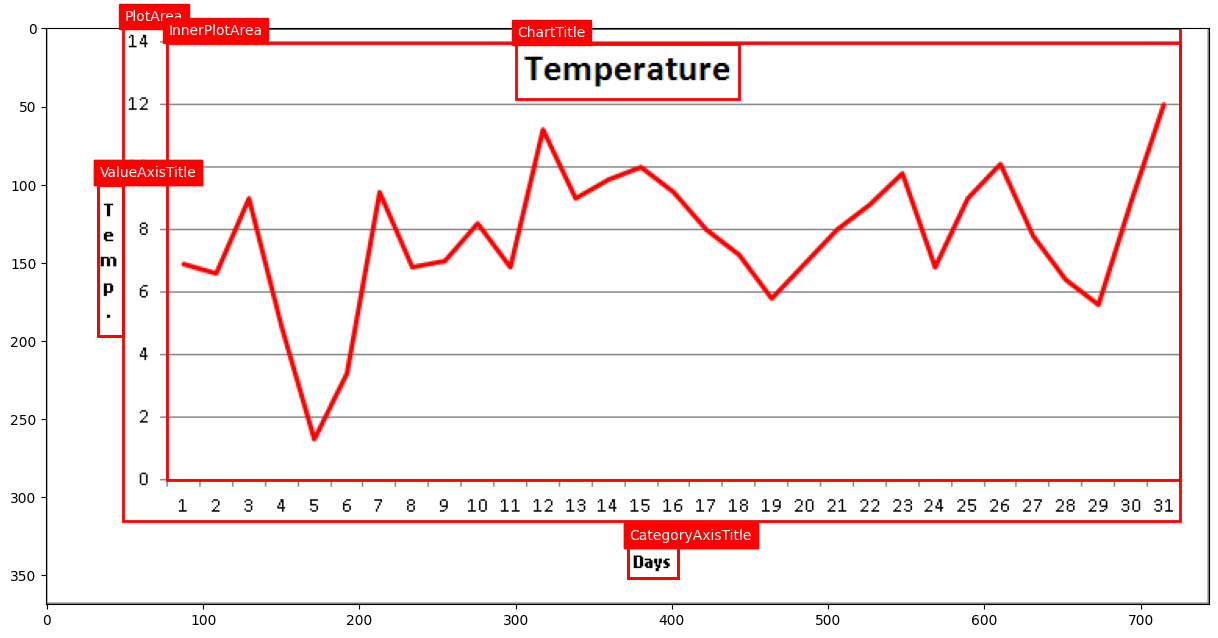

In [12]:
img = Image.open(image_path)

fig, ax = plt.subplots()

image_anns = image_ids_annotations[image_id]

for image_ann in image_anns:
    bbox = image_ann['bbox']
    name = category_id_to_name[image_ann['category_id']]

    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    print(w, y, w, h)

    plt.text(x+1, y-5, name, fontdict={'fontsize':10.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor':'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(bb)

ax.imshow(img)
plt.show()